In [1]:
.L src/transform.cpp

In [2]:
.L src/load_dataset.cpp

In [3]:
.L src/track_chain.cpp

In [4]:
.L src/plot.cpp

In [5]:
.x test/track_chain.C

Test results: 4.8884


In [6]:
char const* path {"dataset/AmBe_x1-y1_Run_99.root"};
DataSetHolder dataset = ambeDataSet(path);

# First event filter with T1

In [7]:
auto eventsDf = filterT1Events(dataset.df, 0.01).Filter("is_event");
eventsDf.Count().GetValue()

(const unsigned long long) 86297


# Chain calculation
## Only full energy chain for now

In [8]:
auto dfTE= eventsDf.Define(
    "Egamma_chain",
    "track_entry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackid, &edep_pvt)"
);

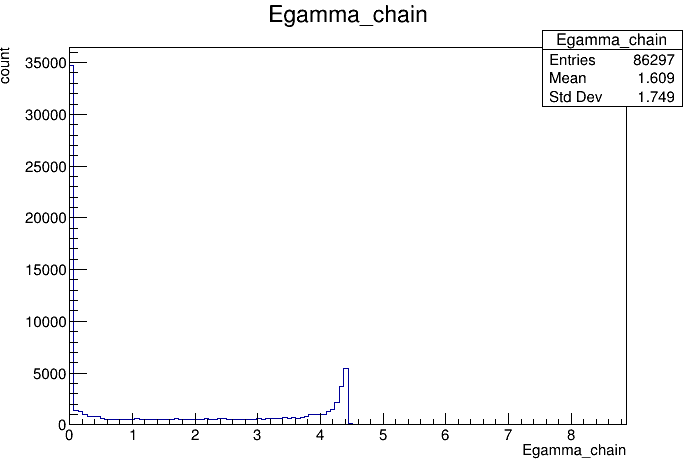

In [9]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfTE.Filter("true").Histo1D("Egamma_chain")->DrawClone();
c.Draw();

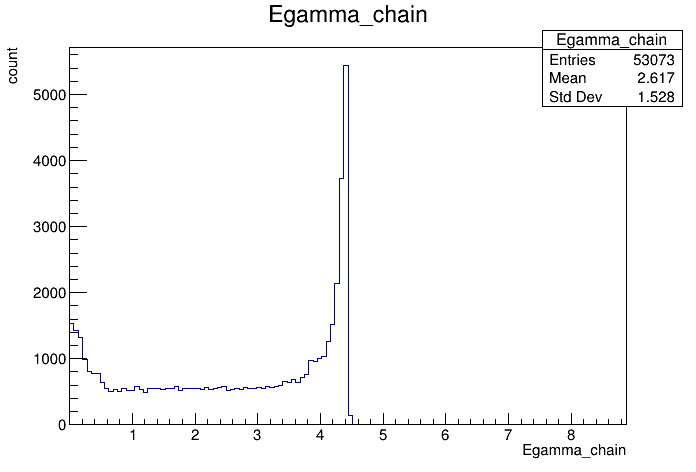

Info in <TCanvas::Print>: pdf file plots/pdf/E_gamma_chain_dist.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/E_gamma_chain_dist.pgf has been created
Info in <TCanvas::Print>: png file plots/png/E_gamma_chain_dist.png has been created


In [10]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfTE.Filter("Egamma_chain").Histo1D("Egamma_chain")->DrawClone();
c.Draw();
savePlot(hist, "E_gamma_chain_dist");

We will probably need to filter those escaping gamma events

For now they wont be an issue

In [11]:
// Ensure that we do not have gamma chain above 4.44 Mev
dfTE.Max("Egamma_chain").GetValue()

(const double) 4.4400000


# First order estimation of compton gamma energy chain
Just taking the most energetic $e^-$ produced by the 4.44 MeV gamma

In [12]:
auto dfCE = dfTE.Define(
    "ComptonEnergy",
    "track_entry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackid, &edep_pvt, true)"
);

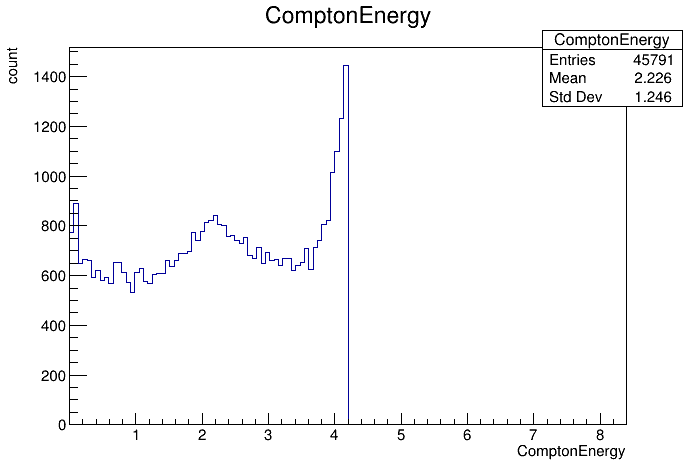

In [13]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfCE.Filter("ComptonEnergy").Histo1D("ComptonEnergy")->DrawClone();
c.Draw();

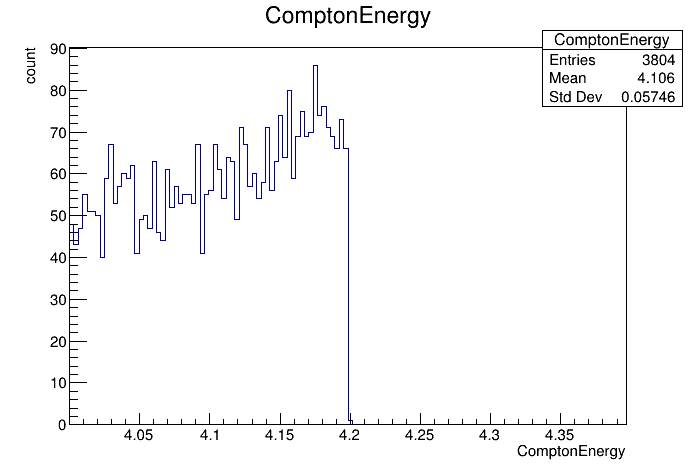

Info in <TCanvas::Print>: pdf file plots/pdf/ComptonEnergy_dist.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/ComptonEnergy_dist.pgf has been created
Info in <TCanvas::Print>: png file plots/png/ComptonEnergy_dist.png has been created


In [14]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfCE.Filter("ComptonEnergy > 4.").Histo1D("ComptonEnergy")->DrawClone();
c.Draw();
savePlot(hist, "ComptonEnergy_dist");

In [15]:
dfCE.Max("ComptonEnergy").GetValue()  // A bit above compton edge

(const double) 4.1983776


# Total E - CE

In [16]:
auto dfTEmCE = dfCE.Define(
    "TEminusCE",
    "Egamma_chain - ComptonEnergy"
);

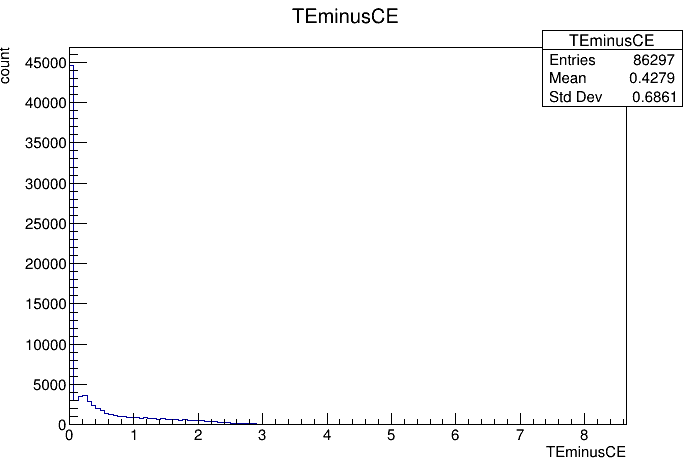

In [17]:
TCanvas c;
auto hist = dfTEmCE.Filter("true").Histo1D("TEminusCE")->DrawClone();
c.Draw();

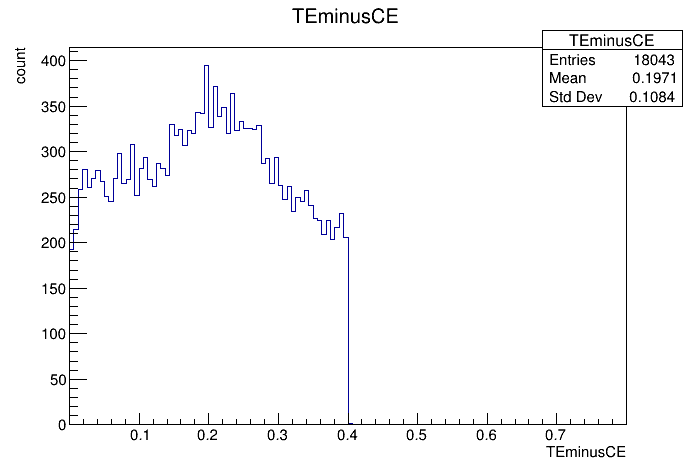

Info in <TCanvas::Print>: pdf file plots/pdf/TEminusCE_dist.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/TEminusCE_dist.pgf has been created
Info in <TCanvas::Print>: png file plots/png/TEminusCE_dist.png has been created


In [18]:
TCanvas c;
auto hist = dfTEmCE.Filter("TEminusCE && TEminusCE < 0.4").Histo1D("TEminusCE")->DrawClone();
c.Draw();
savePlot(hist, "TEminusCE_dist");

In [19]:
dfTEmCE.Filter("Egamma_chain").Count().GetValue()

(const unsigned long long) 53073
